
 subseg 

[  0  12  20  44  45  55  68  90  91  95 114 124 136 149 158 170 181 194
 204 208 226 242 249 262 273 277 296 312 319 331 342 360 364 373 386 402
 408 413]


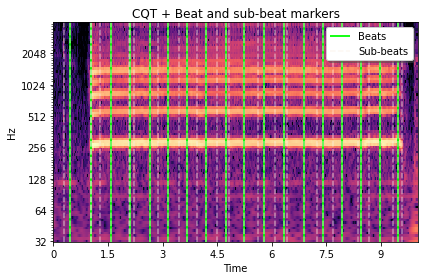

In [10]:

# -*- coding: utf-8 -*-
"""
Created on Fri Oct 12 12:18:03 2018
@author: cvuppalapati
"""
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 12 11:58:12 2018
@author: cvuppalapati
"""

import os
import matplotlib
#matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np
import sys
np.set_printoptions(precision=3)
np.set_printoptions(threshold=sys.maxsize)
# https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html#
librosa.feature.melspectrogram
sig, sample_rate = librosa.load('/content/002.wav') 
sig, sample_rate = librosa.load('002.wav') 
tempo, beats = librosa.beat.beat_track(y=sig, sr=sample_rate, hop_length=512)
beat_times = librosa.frames_to_time(beats, sr=sample_rate, hop_length=512)
cqt = np.abs(librosa.cqt(sig, sr=sample_rate, hop_length=512))
subseg = librosa.segment.subsegment(cqt, beats, n_segments=2)
subseg_t = librosa.frames_to_time(subseg, sr=sample_rate, hop_length=512)
print("\n subseg \n")
print(subseg)
import matplotlib.pyplot as plt
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(cqt,ref=np.max),y_axis='cqt_hz', 
x_axis='time')
lims = plt.gca().get_ylim()
plt.vlines(beat_times, lims[0], lims[1], color='lime', alpha=0.9,linewidth=2, 
label='Beats')
plt.vlines(subseg_t, lims[0], lims[1], color='linen', linestyle='--',linewidth=1.5,
alpha=0.5, label='Sub-beats')
plt.legend(frameon=True, shadow=True)
plt.title('CQT + Beat and sub-beat markers')
plt.tight_layout()
plt.show()
# mel spectrogram
#S = librosa.feature.melspectrogram(S=power, n_mels=hp.n_mels)  # (n_mels, T)
#np.transpose(S.astype(np.float32)), np.transpose(magnitude.astype(np.float32))  
# (T, n_mels), (T, 1+n_fft/2) 
